Part 2 of the project. To be submitted by **08/11/2024 23:59**

-> Total = **50** pts

In [1]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd

# File system manangement
import os

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

<p><img alt="Datasets" src="https://storage.googleapis.com/kaggle-media/competitions/home-credit/home_credit.png" align="left" hspace="10px" vspace="0px"></p>

<h1>Datasets</h1>

In [2]:
### 1- Load the dataset "dataset"
### This dataset should be the app_train from the question 6.a of part 1 (Refer to correction if need be). You can include the previous notebook here, but we recommend instead you export it from previous notebook then load it here.
my_dataset = pd.read_csv('data/app_train_6a.zip', compression='zip')


# In the notebook for the previous part of the project, we exported the app_train dataframe obtained after using oversampling (only) in Question 6a.

In [3]:
my_dataset

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0
2,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,4.0
3,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
4,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565367,456249,0,Cash loans,F,N,Y,0,112500.0,225000.0,22050.0,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0
565368,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
565369,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
565370,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0


#A/ Processing the provided dataset  (review from past assignment, 7 pts)

**1.** Process the categorical features to be correctly handled. Use the most appropriate methods from sklearn (**2** pts)

**2.** Process the anomalies of the dataset (**1** pt)

**3.** Expand the 5 most important features (justify what 'important' means for you) using PolynomialFeatures (**2** pts). You may need to process missing values before.

**4.** Process the features using the best Scaler (**2** pts)

In [4]:
### 1

'''
In order to process the categorical features correctly, we first look at the number of different categories in each
categorical column. This will help choose the most appropriate encoding method.
'''

def get_categories(df):
    # Initialize an empty dictionary to store categories
    categories = {}
    
    # Loop through columns and find categorical ones
    for col in df.columns:
        if df[col].dtype == 'object':
            # Get unique categories for categorical columns
            categories[col] = df[col].unique().tolist()
    
    return categories

categories = get_categories(my_dataset)
print(categories)


{'NAME_CONTRACT_TYPE': ['Cash loans', 'Revolving loans'], 'CODE_GENDER': ['M', 'F', 'XNA'], 'FLAG_OWN_CAR': ['N', 'Y'], 'FLAG_OWN_REALTY': ['Y', 'N'], 'NAME_TYPE_SUITE': ['Unaccompanied', 'Family', 'Spouse, partner', 'Other_A', 'Children', 'Other_B', nan, 'Group of people'], 'NAME_INCOME_TYPE': ['Working', 'Commercial associate', 'Pensioner', 'State servant', 'Unemployed', 'Maternity leave', 'Student', 'Businessman'], 'NAME_EDUCATION_TYPE': ['Secondary / secondary special', 'Incomplete higher', 'Higher education', 'Lower secondary', 'Academic degree'], 'NAME_FAMILY_STATUS': ['Single / not married', 'Widow', 'Married', 'Civil marriage', 'Separated', 'Unknown'], 'NAME_HOUSING_TYPE': ['House / apartment', 'With parents', 'Municipal apartment', 'Rented apartment', 'Office apartment', 'Co-op apartment'], 'OCCUPATION_TYPE': ['Laborers', 'Cooking staff', 'Sales staff', nan, 'Managers', 'Private service staff', 'Core staff', 'High skill tech staff', 'Medicine staff', 'Drivers', 'Security staff

In [5]:
def filter_two_category_columns(categories):
    return {col: vals for col, vals in categories.items() if (len(vals) == 2 or len(vals) == 3)} # we also consider columns with 3 catgories, as the 3rd category is usually 'NA'

two_cat = filter_two_category_columns(categories)
print(two_cat)

{'NAME_CONTRACT_TYPE': ['Cash loans', 'Revolving loans'], 'CODE_GENDER': ['M', 'F', 'XNA'], 'FLAG_OWN_CAR': ['N', 'Y'], 'FLAG_OWN_REALTY': ['Y', 'N'], 'EMERGENCYSTATE_MODE': ['No', 'Yes', nan]}


In [6]:
from sklearn.preprocessing import LabelEncoder

# We define a function to label encode categorical columns with exactly 2 categories
def label_encode_binary_columns(df, categories):
    le = LabelEncoder()
    
    '''
    We loop through categorical columns that have 2 unique categories (we allow columns with 3 categories, since 
    we noticed that some binary columns have a 'NA' category), (i.e. 'CODE GENDER' column has a third 'XNA' gender).
    '''
    for col, vals in categories.items():
        if len(vals) == 2 or len(vals) == 3:
            # We then apply label encoding to the column
            df[col] = le.fit_transform(df[col])
    
    return df

# We now use a label encoder on all binary categorical columns of our data set
my_dataset = label_encode_binary_columns(my_dataset, categories)
my_dataset

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100031,1,0,0,0,1,0,112500.0,979992.0,27076.5,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0
2,100047,1,0,1,0,1,0,202500.0,1193580.0,35028.0,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,4.0
3,100049,1,0,0,0,0,0,135000.0,288873.0,16258.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
4,100096,1,0,0,0,1,0,81000.0,252000.0,14593.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565367,456249,0,0,0,0,1,0,112500.0,225000.0,22050.0,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0
565368,456251,0,0,1,0,0,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
565369,456252,0,0,0,0,1,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
565370,456253,0,0,0,0,1,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0


In [7]:
'''
Finally, we use one-hot encoding to encode all the catgorical features reamining.
We first update the categorical features of our new dataset
'''

categories = get_categories(my_dataset)

cols_to_one_hot = [col for col, vals in categories.items()]
my_dataset = pd.get_dummies(my_dataset, columns=cols_to_one_hot, dtype= 'int64')
my_dataset

# scalar one hot encoder (get rid of less important categories)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,1,0,0,0,0,0,0,0,1,0
1,100031,1,0,0,0,1,0,112500.0,979992.0,27076.5,...,1,0,0,0,0,0,0,0,0,1
2,100047,1,0,1,0,1,0,202500.0,1193580.0,35028.0,...,1,0,0,0,0,0,0,0,1,0
3,100049,1,0,0,0,0,0,135000.0,288873.0,16258.5,...,0,0,0,0,0,0,0,0,0,0
4,100096,1,0,0,0,1,0,81000.0,252000.0,14593.5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565367,456249,0,0,0,0,1,0,112500.0,225000.0,22050.0,...,1,0,0,0,0,0,0,1,0,0
565368,456251,0,0,1,0,0,0,157500.0,254700.0,27558.0,...,1,0,0,0,0,0,0,0,1,0
565369,456252,0,0,0,0,1,0,72000.0,269550.0,12001.5,...,1,0,0,0,0,0,0,0,1,0
565370,456253,0,0,0,0,1,0,153000.0,677664.0,29979.0,...,1,0,0,0,0,0,0,1,0,0


In [8]:
## 2

def process_anomalies(df):
    '''
    Handles null values by filling them with the median.
    Uses the IQR method to detect outliers and caps them to the 
    boundaries if they are beyond the acceptable range.
    '''
    # First identify columns that are originally of integer type, in order to convert back to integer after our manipulations
    int_cols = df.select_dtypes(include=[np.int64, np.int32]).columns

    # Loop through numerical columns for anomaly processing
    for col in df.select_dtypes(include=[np.number]).columns:
        # Fill null values with the median
        df[col] = df[col].fillna(df[col].median())
        
        # Calculate IQR and bounds for anomaly detection
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Cap outliers beyond the upper and lower bound
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

        # Convert back to integer type only if the column was originally integer
        if col in int_cols:
            df[col] = df[col].astype(int)

    
    return df


my_dataset = process_anomalies(my_dataset)
my_dataset


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,1,0,0,0,0,0,0,0,0,0
1,100031,1,0,0,0,1,0,112500.0,979992.0,27076.5,...,1,0,0,0,0,0,0,0,0,0
2,100047,1,0,1,0,1,0,202500.0,1193580.0,35028.0,...,1,0,0,0,0,0,0,0,0,0
3,100049,1,0,0,0,0,0,135000.0,288873.0,16258.5,...,0,0,0,0,0,0,0,0,0,0
4,100096,1,0,0,0,1,0,81000.0,252000.0,14593.5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565367,456249,0,0,0,0,1,0,112500.0,225000.0,22050.0,...,1,0,0,0,0,0,0,0,0,0
565368,456251,0,0,1,0,0,0,157500.0,254700.0,27558.0,...,1,0,0,0,0,0,0,0,0,0
565369,456252,0,0,0,0,1,0,72000.0,269550.0,12001.5,...,1,0,0,0,0,0,0,0,0,0
565370,456253,0,0,0,0,1,0,153000.0,677664.0,29979.0,...,1,0,0,0,0,0,0,0,0,0


In [9]:
## 3

'''
In order to significantly reduce the run time of the following tasks, we choose to downsample our dataset and only 
use a sample of 10000 rows of our dataframe.
We still keep a copy of the original dataframe, in case we need it later.
'''
my_dataset_full = my_dataset.copy()
my_dataset = my_dataset.sample(n=10000, random_state=1)

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures

def get_important_features(df, target_column, n):
    """
    Determines the n most important features based on a RandomForest model.
    """
    # Split features and target
    X = df.drop(columns=[target_column])
    y = df[target_column]
    
    # Train a Random Forest to determine feature importance
    model = RandomForestRegressor()
    model.fit(X, y)
    
    # Get feature importance and select top n
    feature_importance = pd.Series(model.feature_importances_, index=X.columns)
    important_features = feature_importance.nlargest(n).index.tolist()
    
    return important_features

def expand_features(df, features_to_expand):
    '''
    Expands selected features using PolynomialFeatures.
    '''
    poly = PolynomialFeatures(degree=2, include_bias=False)
    feature_data = df[features_to_expand]
    expanded_features = poly.fit_transform(feature_data)
    
    # Create DataFrame for expanded features
    expanded_feature_names = poly.get_feature_names_out(features_to_expand)
    expanded_df = pd.DataFrame(expanded_features, columns=expanded_feature_names, index=df.index)
    
    # Drop original columns and add expanded features
    df = df.drop(columns=features_to_expand).join(expanded_df)
    
    return df

important_features = get_important_features(df=my_dataset, target_column='TARGET', n=5)
my_dataset = expand_features(df=my_dataset, features_to_expand=important_features)


In [10]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def scale_and_evaluate(df, target, model_type='LogisticRegression'):
    '''
    Scales features using different scalers and evaluates model performance to find the best scaler.
    '''
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=42)
    
    # Define scalers to test
    scalers = {
        'StandardScaler': StandardScaler(),
        'MinMaxScaler': MinMaxScaler(),
        'RobustScaler': RobustScaler()
    }
    
    # Dictionary to store performance metrics for each scaler
    performance = {}
    
    # Loop through each scaler and evaluate model performance
    for scaler_name, scaler in scalers.items():
        # Scale the training and testing sets
        X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
        X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
        
        # Initialize the model
        if model_type == 'LogisticRegression':
            model = LogisticRegression(max_iter=1000)
        elif model_type == 'RandomForest':
            model = RandomForestClassifier(n_estimators=100, random_state=42)
        else:
            raise ValueError("Invalid model type. Choose 'LogisticRegression' or 'RandomForest'.")
        
        # Train and evaluate the model
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        performance[scaler_name] = accuracy_score(y_test, y_pred)
    
    return performance

rf_model = 'RandomForest'
scaling_performance = scale_and_evaluate(df=my_dataset.drop(columns=['TARGET']), target=my_dataset['TARGET'], model_type=rf_model)
best_scaler = max(scaling_performance, key=scaling_performance.get)

print(f"For {rf_model}:")
print("Performance of each scaler:", scaling_performance)
print("Best scaler based on accuracy:", best_scaler)

lgr_model = 'LogisticRegression'
scaling_performance = scale_and_evaluate(df=my_dataset.drop(columns=['TARGET']), target=my_dataset['TARGET'], model_type=lgr_model)
best_scaler = max(scaling_performance, key=scaling_performance.get)

print(f"\nFor {lgr_model}:")
print("Performance of each scaler:", scaling_performance)
print("Best scaler based on accuracy:", best_scaler)


For RandomForest:
Performance of each scaler: {'StandardScaler': 0.68, 'MinMaxScaler': 0.6815, 'RobustScaler': 0.679}
Best scaler based on accuracy: MinMaxScaler

For LogisticRegression:
Performance of each scaler: {'StandardScaler': 0.672, 'MinMaxScaler': 0.674, 'RobustScaler': 0.674}
Best scaler based on accuracy: MinMaxScaler


#B/ Basic Machine Learning (8 pts)

In the following, you will use a split of my_dataset between train and validation. The metrics will be evaluated on the validation set.

**5.** Following the lecture and Random Forest example compare the performance of a Random Forest Classifier and a Logistic Regression Classifier:

**5.1** Scale the features (only for Logistic Regression) (**1** pt)

**5.2** Train a Logistic Regression with C = 0.0001  (**1** pt)

**5.3** Evaluate the performance metrics of the Logistic Regression. Which ones are relevant and which are not? (**2** pts)

**5.4** Train a Random Forest Classifier with 100 estimators and the default max_depth (**2** pts)

**5.5** Evaluate the performance metrics of the Random Forest. Which ones are relevant and which are not? (**2** pts)

In [11]:
## 5.1

# Training and testing sets split
X = my_dataset.drop(columns=['TARGET'])  
y = my_dataset['TARGET']                 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Features scaling for Logistic Regression, using the Scaler deemed best in question 4
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [12]:
## 5.2

# Logistic Regression initialization with C = 0.0001
lgr = LogisticRegression(C=0.0001)

# Model training on scaled training data
lgr.fit(X_train_scaled, y_train)

LogisticRegression(C=0.0001)

In [13]:
## 5.3

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Prediction on the test set
y_pred_lgr = lgr.predict(X_test_scaled)
y_prob_lgr = lgr.predict_proba(X_test_scaled)[:, 1]

# Metrics computation
lgr_accuracy = accuracy_score(y_test, y_pred_lgr)
lgr_precision = precision_score(y_test, y_pred_lgr)
lgr_recall = recall_score(y_test, y_pred_lgr)
lgr_f1 = f1_score(y_test, y_pred_lgr)
lgr_auc = roc_auc_score(y_test, y_prob_lgr)

print("Logistic Regression Performance Metrics:")
print(f"Accuracy: {lgr_accuracy}")
print(f"Precision: {lgr_precision}")
print(f"Recall: {lgr_recall}")
print(f"F1 Score: {lgr_f1}")
print(f"AUC-ROC: {lgr_auc}")


Logistic Regression Performance Metrics:
Accuracy: 0.608
Precision: 0.5665594855305466
Recall: 0.8890010090817356
F1 Score: 0.6920659858601729
AUC-ROC: 0.7212494212031175


In [14]:
## 5.4

# Random Forest initialization with 100 estimators and default max_depth
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=None) # Default max_depth = None

# Model training
rf_clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [15]:
## 5.5

# Prediction on the test set
y_pred_rf = rf_clf.predict(X_test)
y_prob_rf = rf_clf.predict_proba(X_test)[:, 1]

# Performance Metrics computation
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)
rf_auc = roc_auc_score(y_test, y_prob_rf)

print("Random Forest Performance Metrics:")
print(f"Accuracy: {rf_accuracy}")
print(f"Precision: {rf_precision}")
print(f"Recall: {rf_recall}")
print(f"F1 Score: {rf_f1}")
print(f"AUC-ROC: {rf_auc}")


Random Forest Performance Metrics:
Accuracy: 0.6795
Precision: 0.665406427221172
Recall: 0.7103935418768921
F1 Score: 0.6871644704734017
AUC-ROC: 0.7472510273332139


#C/ Machine Learning Hyper-parameter optimization (10 pts)

**6.** Use a grid-search to find a better combination C value and "class_weight" value for the previous Logistic Regression Model (you can do a search manually with a loop or use Scikit-learn grid search features) (**2** pts)

**7.1** Use a random search to find a better combination C value and "class_weight" value for the previous Logistic Regression Model.  (you can do a search manually with a loop or use Scikit-learn grid search features) (**2** pts)

**7.2** How many random iterations are needed to find performances as good as your previous grid search? (**2** pts)


**8.1** Plot how the performance metric selected in 5.5 changes when changing the number of estimators? When changing the depth of the trees (max 10)? (**2** pts)

**8.2** What are the optimal values of these parameters (optimized together)? (**2** pts)

In [16]:
## 6

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10],
    'class_weight': [None, 'balanced']
}

# Logistic Regression with GridSearchCV (5-fold cross-validation)
log_reg = LogisticRegression(max_iter=100, random_state=42)
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Grid Search results
best_params_grid = grid_search.best_params_
best_score_grid = grid_search.best_score_

print("Best Parameters from Grid Search:", best_params_grid)
print("Best F1 Score from Grid Search:", best_score_grid)


Best Parameters from Grid Search: {'C': 0.0001, 'class_weight': None}
Best F1 Score from Grid Search: 0.6990662639111644


/Users/claraduchossois/Documents/MADS/MADS Sem 3/Advanced Topics in ML/Project/env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
# ## 7.1

# from sklearn.model_selection import RandomizedSearchCV

# param_dist = {
#     'C': np.logspace(-4, 2, 50),  # Wider range of C values
#     'class_weight': [None, 'balanced']
# }

# # Logistic Regression with RandomizedSearchCV (5-fold cross-validation)
# rdm_search = RandomizedSearchCV(estimator=log_reg, param_distributions=param_dist, n_iter=30, cv=5, scoring='f1', n_jobs=-1, random_state=42)
# rdm_search.fit(X_train_scaled, y_train)

# # Random Search Results
# best_params_rdm = rdm_search.best_params_
# best_score_rdm = rdm_search.best_score_

# print("Best Parameters from Random Search:", best_params_rdm)
# print("Best F1 Score from Random Search:", best_score_rdm)


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the parameter distribution for Logistic Regression
param_dist = {
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10],
    'class_weight': [None, 'balanced']
}

# Initialize a dictionary to store results for each iteration count
results_by_iterations = {}

# Loop over different iteration counts
for n_iter in range(1, 10, 1):
    print(f"Running RandomizedSearchCV with n_iter={n_iter}...")
    
    # RandomizedSearchCV with current n_iter
    rdm_search = RandomizedSearchCV(estimator=log_reg, param_distributions=param_dist, n_iter=n_iter, cv=5, scoring='f1', n_jobs=-1, random_state=42)
    rdm_search.fit(X_train_scaled, y_train)
    
    # Store the best parameters and score for this n_iter
    best_params = rdm_search.best_params_
    best_score = rdm_search.best_score_
    results_by_iterations[n_iter] = {'Best Parameters': best_params, 'Best Score': best_score}
    
    print(f"Best Parameters for n_iter={n_iter}: {best_params}")
    print(f"Best F1 Score for n_iter={n_iter}: {best_score}\n")

# Print summarized results for all iteration counts
print("\nSummary of Random Search Results:")
for n_iter, results in results_by_iterations.items():
    print(f"n_iter={n_iter}: Best Score={results['Best Score']}, Best Parameters={results['Best Parameters']}")


Running RandomizedSearchCV with n_iter=1...
Best Parameters for n_iter=1: {'class_weight': None, 'C': 10}
Best F1 Score for n_iter=1: 0.6813402944413822

Running RandomizedSearchCV with n_iter=2...
Best Parameters for n_iter=2: {'class_weight': None, 'C': 10}
Best F1 Score for n_iter=2: 0.6813402944413822

Running RandomizedSearchCV with n_iter=3...
Best Parameters for n_iter=3: {'class_weight': None, 'C': 0.0001}
Best F1 Score for n_iter=3: 0.6990662639111644

Running RandomizedSearchCV with n_iter=4...
Best Parameters for n_iter=4: {'class_weight': None, 'C': 0.0001}
Best F1 Score for n_iter=4: 0.6990662639111644

Running RandomizedSearchCV with n_iter=5...
Best Parameters for n_iter=5: {'class_weight': None, 'C': 0.0001}
Best F1 Score for n_iter=5: 0.6990662639111644

Running RandomizedSearchCV with n_iter=6...
Best Parameters for n_iter=6: {'class_weight': None, 'C': 0.0001}
Best F1 Score for n_iter=6: 0.6990662639111644

Running RandomizedSearchCV with n_iter=7...
Best Parameters 

/Users/claraduchossois/Documents/MADS/MADS Sem 3/Advanced Topics in ML/Project/env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best Parameters for n_iter=8: {'class_weight': None, 'C': 0.0001}
Best F1 Score for n_iter=8: 0.6990662639111644

Running RandomizedSearchCV with n_iter=9...


/Users/claraduchossois/Documents/MADS/MADS Sem 3/Advanced Topics in ML/Project/env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best Parameters for n_iter=9: {'class_weight': None, 'C': 0.0001}
Best F1 Score for n_iter=9: 0.6990662639111644

Running RandomizedSearchCV with n_iter=10...


/Users/claraduchossois/Documents/MADS/MADS Sem 3/Advanced Topics in ML/Project/env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best Parameters for n_iter=10: {'class_weight': None, 'C': 0.0001}
Best F1 Score for n_iter=10: 0.6990662639111644

Running RandomizedSearchCV with n_iter=11...


/Users/claraduchossois/Documents/MADS/MADS Sem 3/Advanced Topics in ML/Project/env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best Parameters for n_iter=11: {'class_weight': None, 'C': 0.0001}
Best F1 Score for n_iter=11: 0.6990662639111644

Running RandomizedSearchCV with n_iter=12...


/Users/claraduchossois/Documents/MADS/MADS Sem 3/Advanced Topics in ML/Project/env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best Parameters for n_iter=12: {'class_weight': None, 'C': 0.0001}
Best F1 Score for n_iter=12: 0.6990662639111644

Running RandomizedSearchCV with n_iter=13...


/Users/claraduchossois/Documents/MADS/MADS Sem 3/Advanced Topics in ML/Project/env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best Parameters for n_iter=13: {'class_weight': None, 'C': 0.0001}
Best F1 Score for n_iter=13: 0.6990662639111644

Running RandomizedSearchCV with n_iter=14...
Best Parameters for n_iter=14: {'class_weight': None, 'C': 0.0001}
Best F1 Score for n_iter=14: 0.6990662639111644


Summary of Random Search Results:
n_iter=1: Best Score=0.6813402944413822, Best Parameters={'class_weight': None, 'C': 10}
n_iter=2: Best Score=0.6813402944413822, Best Parameters={'class_weight': None, 'C': 10}
n_iter=3: Best Score=0.6990662639111644, Best Parameters={'class_weight': None, 'C': 0.0001}
n_iter=4: Best Score=0.6990662639111644, Best Parameters={'class_weight': None, 'C': 0.0001}
n_iter=5: Best Score=0.6990662639111644, Best Parameters={'class_weight': None, 'C': 0.0001}
n_iter=6: Best Score=0.6990662639111644, Best Parameters={'class_weight': None, 'C': 0.0001}
n_iter=7: Best Score=0.6990662639111644, Best Parameters={'class_weight': None, 'C': 0.0001}
n_iter=8: Best Score=0.6990662639111644, Best

/Users/claraduchossois/Documents/MADS/MADS Sem 3/Advanced Topics in ML/Project/env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
## 7.2

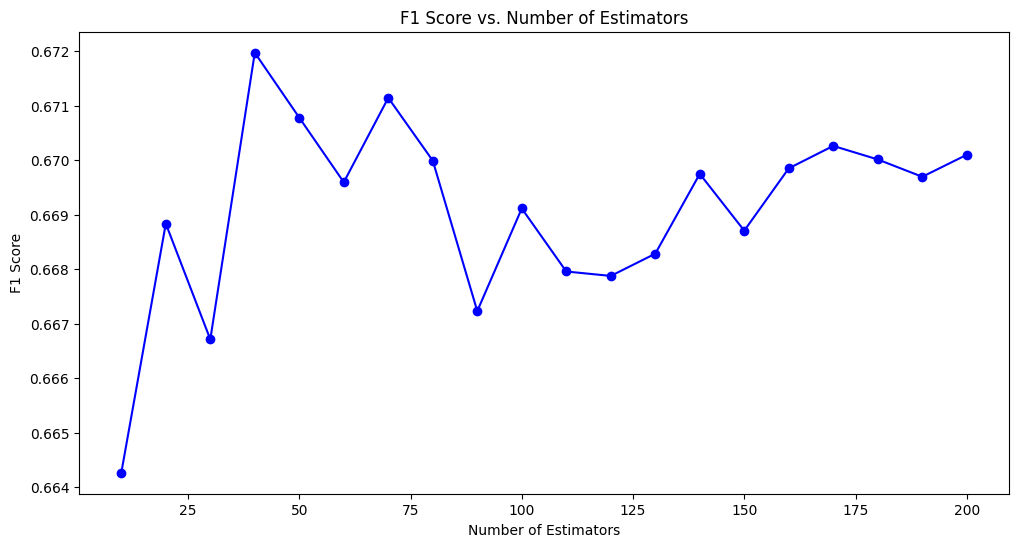

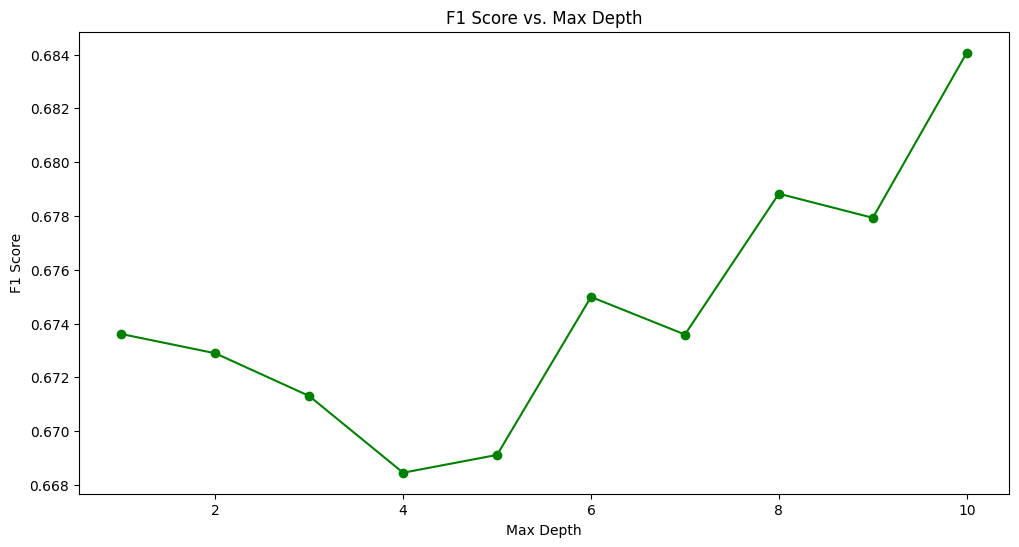

In [20]:
## 8.1

import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Define range of values for n_estimators and max_depth
n_estimators_range = range(10, 210, 10)
max_depth_range = range(1, 11)

# Store scores
f1_scores_n_estimators = []
f1_scores_max_depth = []

# Evaluate impact of n_estimators with fixed max_depth (e.g., max_depth=5)
for n in n_estimators_range:
    rf_clf = RandomForestClassifier(n_estimators=n, max_depth=5, random_state=42)
    scores = cross_val_score(rf_clf, X_train, y_train, cv=5, scoring='f1')
    f1_scores_n_estimators.append(scores.mean())

# Plot F1 Score vs. n_estimators
plt.figure(figsize=(12, 6))
plt.plot(n_estimators_range, f1_scores_n_estimators, marker='o', color='b')
plt.title("F1 Score vs. Number of Estimators")
plt.xlabel("Number of Estimators")
plt.ylabel("F1 Score")
plt.show()

# Evaluate impact of max_depth with fixed n_estimators (e.g., n_estimators=100)
for depth in max_depth_range:
    rf_clf = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=42)
    scores = cross_val_score(rf_clf, X_train, y_train, scoring='f1')
    f1_scores_max_depth.append(scores.mean())

# Plot F1 Score vs. max_depth
plt.figure(figsize=(12, 6))
plt.plot(max_depth_range, f1_scores_max_depth, marker='o', color='g')
plt.title("F1 Score vs. Max Depth")
plt.xlabel("Max Depth")
plt.ylabel("F1 Score")
plt.show()

In [21]:
## 8.2

# Define parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': n_estimators_range,
    'max_depth': max_depth_range
}

# Set up GridSearchCV for Random Forest
rf_grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid_rf, cv=5, scoring='f1', n_jobs=-1)

# Fit GridSearch
rf_grid_search.fit(X_train, y_train)

# Best parameters and score
best_params_rf = rf_grid_search.best_params_
best_score_rf = rf_grid_search.best_score_

print("Optimal Random Forest Parameters:", best_params_rf)
print("Best F1 Score for Random Forest:", best_score_rf)


KeyboardInterrupt: 

#D/ Post Machine Learning Feature inteprepretation (5 pts)

**9.1** Get the features importance of the Optimal Random Forest classifier (obtained in 8) (**2** pts)

**9.2** Are they the features that are the most correlated with the target? (**1** pt)

**10.** Compare the tree structure obtained with visualization (using export_graphviz for instance) of the first tree of your random forest and the last tree of your random forest. How can you explain the differences?  (**2** pts)


In [ ]:
## 9.1

import pandas as pd
import numpy as np

# Get feature importance from the optimized Random Forest model
optimal_rf = rf_grid_search.best_estimator_
feature_importances = optimal_rf.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display top features
print("Feature Importances from the Optimal Random Forest:")
print(feature_importance_df)


Feature Importances from the Optimal Random Forest:
                             Feature  Importance
240        EXT_SOURCE_2 EXT_SOURCE_3    0.080301
234                     EXT_SOURCE_2    0.054778
245          EXT_SOURCE_3 DAYS_BIRTH    0.054710
241          EXT_SOURCE_2 DAYS_BIRTH    0.053599
239                   EXT_SOURCE_2^2    0.047797
..                               ...         ...
107  NAME_TYPE_SUITE_Group of people    0.000000
108          NAME_TYPE_SUITE_Other_A    0.000000
109          NAME_TYPE_SUITE_Other_B    0.000000
110  NAME_TYPE_SUITE_Spouse, partner    0.000000
127     NAME_FAMILY_STATUS_Separated    0.000000

[254 rows x 2 columns]


In [ ]:
## 9.2

# Calculate correlation between each feature and the target
correlations = X_train.apply(lambda x: x.corr(y_train))

# Create a DataFrame to display correlation with target and compare with feature importance
correlation_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Correlation_with_Target': correlations
}).sort_values(by='Correlation_with_Target', ascending=False)

print("Correlation of Features with the Target:")
print(correlation_df)

# Compare top features by importance with top features by correlation
top_features_importance = feature_importance_df.head(5)['Feature'].values
top_features_correlation = correlation_df.head(5)['Feature'].values

print("\nTop 5 Features by Importance:", top_features_importance)
print("Top 5 Features by Correlation with Target:", top_features_correlation)


Correlation of Features with the Target:
                                                         Feature  \
EXT_SOURCE_2 DAYS_BIRTH                  EXT_SOURCE_2 DAYS_BIRTH   
EXT_SOURCE_3 DAYS_BIRTH                  EXT_SOURCE_3 DAYS_BIRTH   
EXT_SOURCE_2 DAYS_ID_PUBLISH        EXT_SOURCE_2 DAYS_ID_PUBLISH   
EXT_SOURCE_3 DAYS_ID_PUBLISH        EXT_SOURCE_3 DAYS_ID_PUBLISH   
EXT_SOURCE_2 DAYS_REGISTRATION    EXT_SOURCE_2 DAYS_REGISTRATION   
...                                                          ...   
WALLSMATERIAL_MODE_Monolithic      WALLSMATERIAL_MODE_Monolithic   
WALLSMATERIAL_MODE_Others              WALLSMATERIAL_MODE_Others   
WALLSMATERIAL_MODE_Panel                WALLSMATERIAL_MODE_Panel   
WALLSMATERIAL_MODE_Stone, brick  WALLSMATERIAL_MODE_Stone, brick   
WALLSMATERIAL_MODE_Wooden              WALLSMATERIAL_MODE_Wooden   

                                 Correlation_with_Target  
EXT_SOURCE_2 DAYS_BIRTH                         0.294710  
EXT_SOURCE_3 DAYS_BIRTH 

In [ ]:
## 10

from sklearn.tree import export_graphviz
import graphviz

# Export and visualize the first tree
first_tree = optimal_rf.estimators_[0]
dot_data_first = export_graphviz(first_tree, feature_names=X_train.columns, filled=True, rounded=True, special_characters=True)
graph_first = graphviz.Source(dot_data_first)
graph_first.render("first_tree")

# Export and visualize the last tree
last_tree = optimal_rf.estimators_[-1]
dot_data_last = export_graphviz(last_tree, feature_names=X_train.columns, filled=True, rounded=True, special_characters=True)
graph_last = graphviz.Source(dot_data_last)
graph_last.render("last_tree")

# Display the graphs
graph_first.view()
graph_last.view()


ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

#E/ Evasion attacks (12pts)

**11.** Implement the Algorithm 2 from the research paper in https://arxiv.org/pdf/1605.07277.pdf

Section 6.5 of the research paper describes the intuition of the algorithm and the different parameters (**5** pts).

PS: the whole paper gives you a good understand of adversarial attacks and is a recommended reading

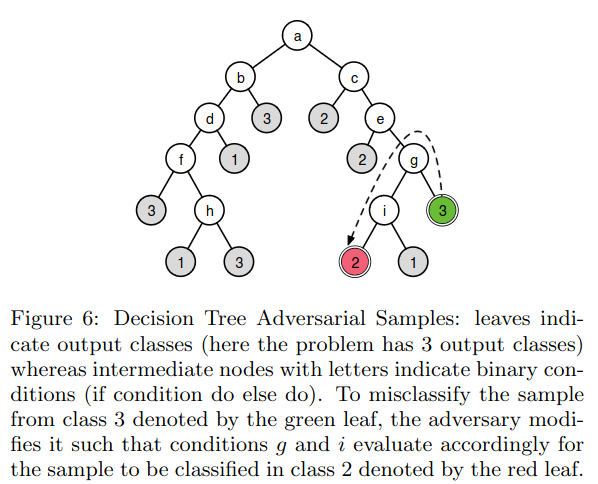

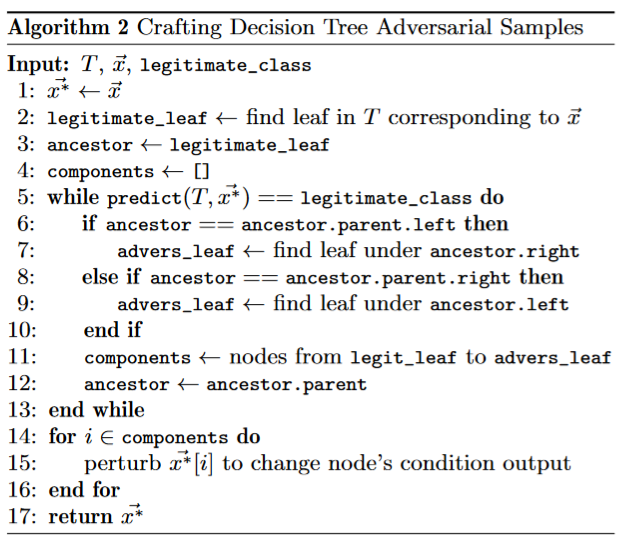

In [ ]:
def my_decision_tree_attack(model, x):
  x_adv = x
  ## generate the adversarials

  return x_adv

**12.1** Either using the attack you implemented in question 11. or using the library Adversarial Robustness Toolbox (https://github.com/Trusted-AI/adversarial-robustness-toolbox/), generate a Decision Tree Attack on the validation set on the first tree of the random forest (cf question 10). (**5** pts).


**12.2** Evaluate the AUC on the generated adversarial examples. It should be lower than the AUC obtained on question 8.2. (**2** pts).

#F/ Semi-supervised Learning (8pts)

It is recommended to optimize the hyper parameters of each of the techniques

**13.1** Using LabelPropagation from sklearn library, fit the labels using the validation set and infer the labels of the training set (**3** pts)

**13.2** Using LabelSpreading from sklearn library, fit the labels using the validation set and infer the labels of the training set (**3** pts)

**14.** Compare the silhouette performance metrics and the accuracy of the labels of the clusters obtained using each technique. (**2** pts)